In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
submission_df = pd.read_csv("y_preds.csv")
df_test = pd.read_csv('test_amended.csv')

In [3]:
df_test_non = pd.read_csv('test.csv')

In [4]:
df_test.iloc[889]

galactic year                                  1.016064e+06
existence expectancy index                     6.785971e-01
existence expectancy at birth                  6.664513e+01
Gross income per capita                        1.309342e+04
Income Index                                   5.102614e-01
                                                   ...     
galaxy_Ursa Major II Dwarf                     0.000000e+00
galaxy_Ursa Minor Dwarf                        0.000000e+00
galaxy_Virgo I                                 0.000000e+00
galaxy_Willman 1                               0.000000e+00
galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)    0.000000e+00
Name: 889, Length: 260, dtype: float64

In [5]:
# one of the interpolations was placed below 0.7 which makes the upload break
df_test.iloc[889,1] = 0.75

In [6]:
df_test

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,galaxy_UGCA 292,galaxy_UGCA 438 (ESO 407-018),galaxy_UGCA 86,galaxy_UGCA 92,galaxy_Ursa Major I Dwarf (UMa I dSph),galaxy_Ursa Major II Dwarf,galaxy_Ursa Minor Dwarf,galaxy_Virgo I,galaxy_Willman 1,"galaxy_Wolf-Lundmark-Melotte (WLM, DDO 221)"
0,1007012,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,0,0,0,0,0,0,0,0,0,0
1,1007012,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,0,0,0,0,0,0,0,0,0,0
2,1008016,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,...,0,0,0,0,0,0,0,0,0,0
3,1007012,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,...,0,0,0,0,0,0,0,0,0,0
4,1013042,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064,0.859797,75.291914,18170.157548,0.707996,11.154777,4.190958,0.701760,0.540954,212.874869,...,0,0,0,0,0,0,0,0,0,0
886,1016064,0.912304,72.601017,19767.681597,0.715522,13.126625,10.552630,0.732641,0.622619,190.209811,...,0,0,0,0,0,0,0,0,0,0
887,1016064,1.090993,88.276857,31700.561656,0.957858,19.425120,11.120741,1.092724,0.974172,128.115014,...,0,0,0,0,0,0,0,0,0,0
888,1016064,1.005144,82.100572,25561.963151,0.751660,16.198364,13.756741,0.819249,0.884783,156.160418,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# creating the energy allocation - mean allocation

# amount for galaxies with amount below 0.7
bottom10 = 50000*0.1/len(df_test[df_test['existence expectancy index']<0.7])
topenergy = 50000*0.9/len(df_test[~(df_test['existence expectancy index']<0.7)])
print(bottom10,topenergy)

75.75757575757575 54.61165048543689


In [8]:
energy_allocation = df_test['existence expectancy index'].apply(lambda x: bottom10 if x<0.7 else topenergy)

In [9]:
submission_df['opt_pred'] = energy_allocation

In [10]:
submission_df

,pred,opt_pred
0,0.042958,75.757576
1,0.040278,75.757576
2,0.040578,75.757576
3,0.039974,75.757576
4,0.034631,75.757576
...,...,...
885,0.028160,54.611650
886,0.034358,54.611650
887,0.068576,54.611650
888,0.063241,54.611650


In [11]:
submission_df.reset_index(inplace=True)
#submission_df.to_csv('submission1.csv',index=False)

In [12]:
submission_df.sort_values("pred")

,index,pred,opt_pred
226,226,0.014885,54.611650
49,49,0.016447,75.757576
37,37,0.019692,75.757576
26,26,0.019692,75.757576
34,34,0.019692,75.757576
...,...,...,...
705,705,0.455698,54.611650
800,800,0.455698,54.611650
801,801,0.455698,54.611650
583,583,0.680323,54.611650


## TL - Playing around with optimisation

In [283]:
submission_df_tl = submission_df.copy()
submission_df_tl

,index,pred,opt_pred,index_increase
0,0,0.042958,75.757576,2.671436
1,1,0.040278,75.757576,2.718360
2,2,0.040578,75.757576,2.712963
3,3,0.039974,75.757576,2.723863
4,4,0.034631,75.757576,2.827562
...,...,...,...,...
885,885,0.028160,54.611650,2.144188
886,886,0.034358,54.611650,2.042413
887,887,0.068576,54.611650,1.678355
888,888,0.063241,54.611650,1.721192


In [284]:
submission_df_tl['existence_expectancy_index'] = df_test['existence expectancy index']

In [285]:
submission_df_tl

,index,pred,opt_pred,index_increase,existence_expectancy_index
0,0,0.042958,75.757576,2.671436,0.456086
1,1,0.040278,75.757576,2.718360,0.529835
2,2,0.040578,75.757576,2.712963,0.560976
3,3,0.039974,75.757576,2.723863,0.565910
4,4,0.034631,75.757576,2.827562,0.588274
...,...,...,...,...,...
885,885,0.028160,54.611650,2.144188,0.859797
886,886,0.034358,54.611650,2.042413,0.912304
887,887,0.068576,54.611650,1.678355,1.090993
888,888,0.063241,54.611650,1.721192,1.005144


In [286]:
test1_tl = submission_df_tl.sort_values("pred")

In [287]:
test1_tl

,index,pred,opt_pred,index_increase,existence_expectancy_index
226,226,0.014885,54.611650,2.446761,0.837247
49,49,0.016447,75.757576,3.332686,0.671839
37,37,0.019692,75.757576,3.217386,0.656685
26,26,0.019692,75.757576,3.217386,0.641159
34,34,0.019692,75.757576,3.217386,0.650696
...,...,...,...,...,...
705,705,0.455698,54.611650,0.773811,1.038657
800,800,0.455698,54.611650,0.773811,1.085557
801,801,0.455698,54.611650,0.773811,1.086098
583,583,0.680323,54.611650,0.620438,0.996074


In [288]:
test1_tl

,index,pred,opt_pred,index_increase,existence_expectancy_index
226,226,0.014885,54.611650,2.446761,0.837247
49,49,0.016447,75.757576,3.332686,0.671839
37,37,0.019692,75.757576,3.217386,0.656685
26,26,0.019692,75.757576,3.217386,0.641159
34,34,0.019692,75.757576,3.217386,0.650696
...,...,...,...,...,...
705,705,0.455698,54.611650,0.773811,1.038657
800,800,0.455698,54.611650,0.773811,1.085557
801,801,0.455698,54.611650,0.773811,1.086098
583,583,0.680323,54.611650,0.620438,0.996074


In [289]:
test1_tl.opt_pred.iloc[:500] = 100
test1_tl.opt_pred.iloc[500:] = 0
test1_tl['index_increase'] = test1_tl.opt_pred*(-np.log(submission_df.pred+0.01)+3)**2/1000
test1_tl.index_increase.sum()

1811.8798144030254

In [290]:
#pd.set_option('display.max_rows',None)
test1_tl['potential_increase'] = (-np.log(test1_tl.pred+0.01)+3)**2/1000
test1_tl

,index,pred,opt_pred,index_increase,existence_expectancy_index,potential_increase
226,226,0.014885,100.0,4.480291,0.837247,0.044803
49,49,0.016447,100.0,4.399145,0.671839,0.043991
37,37,0.019692,100.0,4.246950,0.656685,0.042470
26,26,0.019692,100.0,4.246950,0.641159,0.042470
34,34,0.019692,100.0,4.246950,0.650696,0.042470
...,...,...,...,...,...,...
705,705,0.455698,0.0,0.000000,1.038657,0.014169
800,800,0.455698,0.0,0.000000,1.085557,0.014169
801,801,0.455698,0.0,0.000000,1.086098,0.014169
583,583,0.680323,0.0,0.000000,0.996074,0.011361


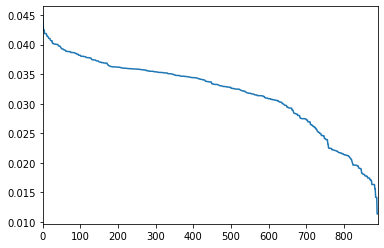

In [291]:
test2_tl = test1_tl.reset_index(drop=True)
test2_tl.potential_increase.plot()

In [292]:
test1_tl.to_csv('test1_tl.csv',index=False)

## Luke - Playing around with optimisation

In [181]:
submission_df['index_increase'] = submission_df.opt_pred*(-np.log(submission_df.pred+0.01)+3)**2/1000

In [182]:
submission_df.index_increase.sum()

1597.651362778016

In [183]:
submission_df.sort_values("pred")

,index,pred,opt_pred,index_increase
226,226,0.014885,54.611650,2.446761
49,49,0.016447,75.757576,3.332686
37,37,0.019692,75.757576,3.217386
26,26,0.019692,75.757576,3.217386
34,34,0.019692,75.757576,3.217386
76,76,0.021095,54.611650,2.286597
138,138,0.021095,54.611650,2.286597
84,84,0.021095,54.611650,2.286597
27,27,0.021095,75.757576,3.171980
141,141,0.021095,54.611650,2.286597


In [184]:
test1 = submission_df.sort_values("pred")

In [185]:
test1

,index,pred,opt_pred,index_increase
226,226,0.014885,54.611650,2.446761
49,49,0.016447,75.757576,3.332686
37,37,0.019692,75.757576,3.217386
26,26,0.019692,75.757576,3.217386
34,34,0.019692,75.757576,3.217386
76,76,0.021095,54.611650,2.286597
138,138,0.021095,54.611650,2.286597
84,84,0.021095,54.611650,2.286597
27,27,0.021095,75.757576,3.171980
141,141,0.021095,54.611650,2.286597


In [186]:
df_test[df_test['existence expectancy index']<0.7].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
           dtype='int64')

In [187]:
test1.opt_pred.iloc[:500] = 100
test1.opt_pred.iloc[500:] = 0
test1['index_increase'] = test1.opt_pred*(-np.log(submission_df.pred+0.01)+3)**2/1000
test1.index_increase.sum()

1811.8798144030254

In [188]:
test1[test1.index.isin(df_test[df_test['existence expectancy index']<0.7].index)]

,index,pred,opt_pred,index_increase
49,49,0.016447,100.0,4.399145
37,37,0.019692,100.0,4.246950
26,26,0.019692,100.0,4.246950
34,34,0.019692,100.0,4.246950
27,27,0.021095,100.0,4.187013
15,15,0.021237,100.0,4.181105
41,41,0.022270,100.0,4.139148
17,17,0.023128,100.0,4.105463
21,21,0.024104,100.0,4.068342
60,60,0.025894,100.0,4.003317


In [35]:
test1[499:501]

,index,pred,opt_pred,index_increase
723,723,0.055550,100.0,3.277488
536,536,0.056333,0.0,0.000000


In [37]:
# check if there are decreasing returns - it would seem that there aren't
(100*(-np.log(0.055550+0.01)+3)**2/1000)-(99*(-np.log(0.055550+0.01)+3)**2/1000)-(1*(-np.log(0.056333+0.01)+3)**2/1000)

0.00013581836830876132

In [39]:
test1.opt_pred.iloc[500:] = 5
test1.opt_pred.iloc[:500] = (50000 - (len(test1.opt_pred.iloc[500:])*5))/500

test1['index_increase'] = test1.opt_pred*(-np.log(submission_df.pred+0.01)+3)**2/1000
test1.index_increase.sum()

/Users/lukebetham/anaconda3/envs/main_env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1792.1555657256326

In [40]:
test1

,index,pred,opt_pred,index_increase
226,226,0.014885,96.1,4.305560
49,49,0.016447,96.1,4.227579
37,37,0.019692,96.1,4.081319
26,26,0.019692,96.1,4.081319
34,34,0.019692,96.1,4.081319
...,...,...,...,...
705,705,0.455698,5.0,0.070847
800,800,0.455698,5.0,0.070847
801,801,0.455698,5.0,0.070847
583,583,0.680323,5.0,0.056805


In [43]:
test1.opt_pred.iloc[:450] = 100
test1.opt_pred.iloc[450:550] = 50
test1.opt_pred.iloc[450:550] = 0


test1['index_increase'] = test1.opt_pred*(-np.log(submission_df.pred+0.01)+3)**2/1000
test1.index_increase.sum()

/Users/lukebetham/anaconda3/envs/main_env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1646.6430951262373

## PuLP - Linear Programming Method

In [280]:
from pulp import *

pd.reset_option('display.max_rows')

In [281]:
# .pulpTestAll() disabled in pulp 2.0?
#pulp.pulpTestAll()

In [294]:
test1_tl = pd.read_csv('test1_tl.csv')
test1_tl.set_index('index')

,pred,opt_pred,index_increase,existence_expectancy_index,potential_increase
index,,,,,
226,0.014885,100.0,4.480291,0.837247,0.044803
49,0.016447,100.0,4.399145,0.671839,0.043991
37,0.019692,100.0,4.246950,0.656685,0.042470
26,0.019692,100.0,4.246950,0.641159,0.042470
34,0.019692,100.0,4.246950,0.650696,0.042470
...,...,...,...,...,...
705,0.455698,0.0,0.000000,1.038657,0.014169
800,0.455698,0.0,0.000000,1.085557,0.014169
801,0.455698,0.0,0.000000,1.086098,0.014169


In [282]:
test1_tl

#index - as per test.csv
#pred - predicted well being index (y from question 1)
#existence_expectancy_index - as per test.csv
#opt_pred - predictions of allocated energy as per Luke's method


#Equations:
#potential_increase = (-np.log(pred+0.01)+3) **2 / 1000
#index_increase = opt_pred * potential_increase


,index,pred,opt_pred,index_increase,existence_expectancy_index,potential_increase
226,226,0.014885,100.0,4.480291,0.837247,0.044803
49,49,0.016447,100.0,4.399145,0.671839,0.043991
37,37,0.019692,100.0,4.246950,0.656685,0.042470
26,26,0.019692,100.0,4.246950,0.641159,0.042470
34,34,0.019692,100.0,4.246950,0.650696,0.042470
...,...,...,...,...,...,...
705,705,0.455698,0.0,0.000000,1.038657,0.014169
800,800,0.455698,0.0,0.000000,1.085557,0.014169
801,801,0.455698,0.0,0.000000,1.086098,0.014169
583,583,0.680323,0.0,0.000000,0.996074,0.011361


In [222]:
#Create a list of test observations
test_galaxy_list = []
for n in test1_tl.index:
    test_galaxy_list.append("test_galaxy_{}".format(n))

In [223]:
#Naming each test observation in test_row
test1_tl['test_row'] = test_galaxy_list
test1_tl

,index,pred,opt_pred,index_increase,existence_expectancy_index,test_row,potential_increase
226,226,0.014885,100.0,4.480291,0.837247,test_galaxy_226,0.044803
49,49,0.016447,100.0,4.399145,0.671839,test_galaxy_49,0.043991
37,37,0.019692,100.0,4.246950,0.656685,test_galaxy_37,0.042470
26,26,0.019692,100.0,4.246950,0.641159,test_galaxy_26,0.042470
34,34,0.019692,100.0,4.246950,0.650696,test_galaxy_34,0.042470
...,...,...,...,...,...,...,...
705,705,0.455698,0.0,0.000000,1.038657,test_galaxy_705,0.014169
800,800,0.455698,0.0,0.000000,1.085557,test_galaxy_800,0.014169
801,801,0.455698,0.0,0.000000,1.086098,test_galaxy_801,0.014169
583,583,0.680323,0.0,0.000000,0.996074,test_galaxy_583,0.011361


In [224]:
#Creating a Linear programming problem with method LpProblem in PuLP
prob = pulp.LpProblem("Optimal Energy Allocation",LpMaximize)

In [225]:
#Create a list of the named test observations
test_galaxy_rows = list(test1_tl['test_row'])

In [226]:
#Create a dictionary of potential index increase for all test observations
potential_increase = dict(zip(test_galaxy_rows,test1_tl['potential_increase']))

In [227]:
#Create a dictionary of existence expectancy index for all test observations
#(This is later used to set condition that Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available)
existence_expectancy_index = dict(zip(test_galaxy_rows,test1_tl['existence_expectancy_index']))

In [228]:
#Create a dictionary of energy variables with the following conditions:
#Lower bound of 0 (as no galaxy should be allocated <0 DSML)
#Upper bound of 100 (as no galaxy should be allocated >100 zillion DSML)
energy_allocated = pulp.LpVariable.dicts("Energy",test_galaxy_rows,lowBound=0,upBound=100,cat='Continuous')

In [229]:
#Building the LP problem by adding the main objective function i.e. maximising sum of index_increase (equation below)
#For each test observation, index_increase = potential_increase * energy allocated
#Goal is to maximise sum of index_increase across all test observations
prob += pulp.lpSum([potential_increase[i]*energy_allocated[i] for i in test_galaxy_rows])

In [230]:
#Adding in constraint that total energy allocated cannot exceed the 50000 zillion DSML available for allocation 
prob += pulp.lpSum([energy_allocated[i] for i in test_galaxy_rows]) <= 50000

In [231]:
#Adding in constraint that galaxies with existence expectancy index < 0.7 needs >= 10% of the total energy available 
prob += pulp.lpSum([energy_allocated[i] for i in test_galaxy_rows
               if existence_expectancy_index[i] < 0.7]) >= 5000

In [232]:
#Solving the problem
prob.solve()

1

In [233]:
#Printing status of the solution
print("Status:", LpStatus[prob.status])

Status: Optimal


In [242]:
#Using pulp.value function to view the maximum value of the objective function (i.e. max index increase)
print(pulp.value(prob.objective))

#This shows the max value calculated by PuPL is same as max value derived from Luke's method

1811.8798144030247


In [234]:
#Printing out the galaxies which have >0 energy allocated
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

Energy_test_galaxy_0 = 100.0
Energy_test_galaxy_1 = 100.0
Energy_test_galaxy_10 = 100.0
Energy_test_galaxy_100 = 100.0
Energy_test_galaxy_101 = 100.0
Energy_test_galaxy_102 = 100.0
Energy_test_galaxy_103 = 100.0
Energy_test_galaxy_104 = 100.0
Energy_test_galaxy_105 = 100.0
Energy_test_galaxy_106 = 100.0
Energy_test_galaxy_107 = 100.0
Energy_test_galaxy_108 = 100.0
Energy_test_galaxy_109 = 100.0
Energy_test_galaxy_11 = 100.0
Energy_test_galaxy_110 = 100.0
Energy_test_galaxy_111 = 100.0
Energy_test_galaxy_112 = 100.0
Energy_test_galaxy_113 = 100.0
Energy_test_galaxy_114 = 100.0
Energy_test_galaxy_115 = 100.0
Energy_test_galaxy_116 = 100.0
Energy_test_galaxy_117 = 100.0
Energy_test_galaxy_118 = 100.0
Energy_test_galaxy_119 = 100.0
Energy_test_galaxy_12 = 100.0
Energy_test_galaxy_120 = 100.0
Energy_test_galaxy_121 = 100.0
Energy_test_galaxy_122 = 100.0
Energy_test_galaxy_123 = 100.0
Energy_test_galaxy_124 = 100.0
Energy_test_galaxy_125 = 100.0
Energy_test_galaxy_126 = 100.0
Energy_test_gal

In [235]:
#Printing out all galaxies and allocated energy for reference
for v in prob.variables():
    print(v.name, "=", v.varValue)

Energy_test_galaxy_0 = 100.0
Energy_test_galaxy_1 = 100.0
Energy_test_galaxy_10 = 100.0
Energy_test_galaxy_100 = 100.0
Energy_test_galaxy_101 = 100.0
Energy_test_galaxy_102 = 100.0
Energy_test_galaxy_103 = 100.0
Energy_test_galaxy_104 = 100.0
Energy_test_galaxy_105 = 100.0
Energy_test_galaxy_106 = 100.0
Energy_test_galaxy_107 = 100.0
Energy_test_galaxy_108 = 100.0
Energy_test_galaxy_109 = 100.0
Energy_test_galaxy_11 = 100.0
Energy_test_galaxy_110 = 100.0
Energy_test_galaxy_111 = 100.0
Energy_test_galaxy_112 = 100.0
Energy_test_galaxy_113 = 100.0
Energy_test_galaxy_114 = 100.0
Energy_test_galaxy_115 = 100.0
Energy_test_galaxy_116 = 100.0
Energy_test_galaxy_117 = 100.0
Energy_test_galaxy_118 = 100.0
Energy_test_galaxy_119 = 100.0
Energy_test_galaxy_12 = 100.0
Energy_test_galaxy_120 = 100.0
Energy_test_galaxy_121 = 100.0
Energy_test_galaxy_122 = 100.0
Energy_test_galaxy_123 = 100.0
Energy_test_galaxy_124 = 100.0
Energy_test_galaxy_125 = 100.0
Energy_test_galaxy_126 = 100.0
Energy_test_gal

In [246]:
#Creating dataframe of test observation and energy allocated by PuPL solver
pd.set_option('display.max_rows',None)
v_dict = {v.name:v.varValue for v in prob.variables()}
v_df = pd.DataFrame.from_dict(v_dict,orient='index').reset_index()
v_df
v_df.rename(columns={0:"opt_pred_pupl","index":'test_row'},inplace=True)
v_df.test_row = v_df.test_row.apply(lambda x:x.replace("Energy_",""))
v_df
#columns=['test_galaxy_row','energy_allocation'])

,test_row,opt_pred_pupl
0,test_galaxy_0,100.0
1,test_galaxy_1,100.0
2,test_galaxy_10,100.0
3,test_galaxy_100,100.0
4,test_galaxy_101,100.0
5,test_galaxy_102,100.0
6,test_galaxy_103,100.0
7,test_galaxy_104,100.0
8,test_galaxy_105,100.0
9,test_galaxy_106,100.0


In [247]:
#Merging test1_tl dataframe with above dataframe
test_df_merged = test1_tl.merge(v_df,on='test_row')
test_df_merged

,index,pred,opt_pred,index_increase,existence_expectancy_index,test_row,potential_increase,opt_pred_pupl
0,226,0.014885,100.0,4.480291,0.837247,test_galaxy_226,0.044803,100.0
1,49,0.016447,100.0,4.399145,0.671839,test_galaxy_49,0.043991,100.0
2,37,0.019692,100.0,4.246950,0.656685,test_galaxy_37,0.042470,100.0
3,26,0.019692,100.0,4.246950,0.641159,test_galaxy_26,0.042470,100.0
4,34,0.019692,100.0,4.246950,0.650696,test_galaxy_34,0.042470,100.0
5,76,0.021095,100.0,4.187013,0.720587,test_galaxy_76,0.041870,100.0
6,138,0.021095,100.0,4.187013,0.775467,test_galaxy_138,0.041870,100.0
7,84,0.021095,100.0,4.187013,0.730208,test_galaxy_84,0.041870,100.0
8,27,0.021095,100.0,4.187013,0.641172,test_galaxy_27,0.041870,100.0
9,141,0.021095,100.0,4.187013,0.778298,test_galaxy_141,0.041870,100.0


In [251]:
#The below shows there are no disagreements between initial energy allocation and PuPL energy allocation
test_df_merged[test_df_merged['opt_pred']!=test_df_merged['opt_pred']]

,index,pred,opt_pred,index_increase,existence_expectancy_index,test_row,potential_increase,opt_pred_pupl
